In [180]:
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("car_evaluation.csv")
df.rename(columns={'vhigh' : 'buying price', 'vhigh.1' : 'maintenance cost', 
                   '2' : 'number of doors', '2.1' : 'number of persons', 'small' : 'lug_boot',
                   'low' : 'safety', 'unacc' : 'decision'}, inplace=True)
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
X = df.drop(columns=['decision']) 
Y = df['decision'] 
X.insert(0, 'bias', np.ones(len(X)))
X

,bias,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety
0,1.0,vhigh,vhigh,2,2,small,med
1,1.0,vhigh,vhigh,2,2,small,high
2,1.0,vhigh,vhigh,2,2,med,low
3,1.0,vhigh,vhigh,2,2,med,med
4,1.0,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...,...
1722,1.0,low,low,5more,more,med,med
1723,1.0,low,low,5more,more,med,high
1724,1.0,low,low,5more,more,big,low
1725,1.0,low,low,5more,more,big,med


In [7]:
X = pd.get_dummies(X)
X

,bias,buying price_high,buying price_low,buying price_med,buying price_vhigh,maintenance cost_high,maintenance cost_low,maintenance cost_med,maintenance cost_vhigh,number of doors_2,...,number of doors_5more,number of persons_2,number of persons_4,number of persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,1.0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
1,1.0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
2,1.0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,1.0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
4,1.0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,1.0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1723,1.0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1724,1.0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1725,1.0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [8]:
Y = pd.get_dummies(Y)
Y

,acc,good,unacc,vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1722,0,1,0,0
1723,0,0,0,1
1724,0,0,1,0
1725,0,1,0,0


In [9]:
X = X.to_numpy()
Y = Y.to_numpy()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [11]:
def h_theta(X, theta): 
    return softmax(np.dot(X, theta.T))

In [132]:
def loss(X, Y, theta):
    pred = h_theta(X, theta)  
    pred = np.clip(pred, 1e-13, 1 - 1e-13)
    term = Y * np.log(pred) 
    return np.mean(-1 * np.sum(term, axis=1))  

In [98]:
def softmax(Z): 
    return np.exp(Z - np.max(Z, axis=1).reshape(Z.shape[0], -1)) / np.sum(np.exp(Z - np.max(Z, axis=1).reshape(Z.shape[0], -1)), axis=1)[:, np.newaxis]   

In [177]:
def gradient_descent(X, Y, alpha):   
    costs = [] 
    itrs = []
    theta = np.zeros((Y.shape[1], X.shape[1]))  
    itr = 5000 
    while itr > 0:
        theta = theta - alpha * np.matmul((h_theta(X, theta) - Y).T, X) 
        itr -= 1 
        if (itr % 100 == 0):
            costs.append(loss(X, Y, theta))  
            itrs.append(itr)
    return theta, costs, itrs

In [178]:
theta, costs, itrs = gradient_descent(X_train, Y_train, 0.01) 
pred = h_theta(X_test, theta)    

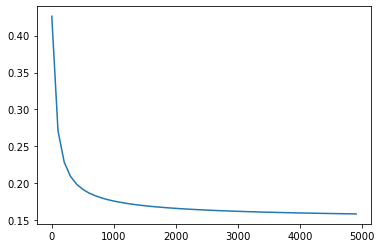

In [179]:
plt.plot(itrs[::-1], costs)
plt.show()

In [130]:
acc = sum(np.all(Y_test == np.rint(pred).astype(int), axis = 1)) / len(Y_test) 
print(f'accuracy : {acc * 100} %')

accuracy : 91.32947976878613 %
